Попробуем синтаксический парсер SpaCy 

In [ ]:
! pip3 install -U spacy

In [ ]:
import spacy
from spacy import displacy
# !python -m spacy download ru_core_news_lg

In [ ]:
nlp = spacy.load('ru_core_news_lg')

In [ ]:
sent = "В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы."

In [ ]:
doc = nlp(sent)
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])


displacy.render(doc, style='dep', jupyter=True)

В case Африке PROPN []
Африке ROOT Африке PROPN [В, акулы, Африке, Африке, .]
акулы nmod Африке PROPN []
, punct Африке PROPN []
В case Африке PROPN []
Африке conj Африке PROPN [,, В, гориллы]
гориллы nmod Африке PROPN []
, punct Африке PROPN []
В case Африке PROPN []
Африке conj Африке PROPN [,, В, крокодилы]
большие amod крокодилы NOUN []
Злые amod крокодилы NOUN []
крокодилы nsubj Африке PROPN [большие, Злые]
. punct Африке PROPN []


In [ ]:
sent = "В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы Будут вас кусать, Бить и обижать,- Не ходите, дети, В Африку гулять."
doc = nlp(sent)
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])
from spacy import displacy
displacy.render(doc, style='dep', jupyter=True)

В case Африке PROPN []
Африке obl ходите VERB [В, акулы, Африке, кусать]
акулы nmod Африке PROPN []
, punct Африке PROPN []
В case Африке PROPN []
Африке conj Африке PROPN [,, В, гориллы]
гориллы nmod Африке PROPN []
, punct кусать VERB []
В case Африке PROPN []
Африке obl кусать VERB [В]
большие amod крокодилы NOUN []
Злые amod крокодилы NOUN []
крокодилы nsubj кусать VERB [большие, Злые]
Будут aux кусать VERB []
вас obj кусать VERB []
кусать conj Африке PROPN [,, Африке, крокодилы, Будут, вас, Бить]
, punct Бить VERB []
Бить conj кусать VERB [,]
и cc ходите VERB []
обижать,- nsubj ходите VERB []
Не advmod ходите VERB []
ходите ROOT ходите VERB [Африке, и, обижать,-, Не, дети, гулять, .]
, punct дети NOUN []
дети conj ходите VERB [,]
, punct гулять VERB []
В case Африку PROPN []
Африку obl гулять VERB [В]
гулять conj ходите VERB [,, Африку]
. punct ходите VERB []


Проверим, какой результат даст парсер UDpipe

In [1]:
! pip3 install ufal.udpipe

     |████████████████████████████████| 304 kB 4.2 MB/s 
  Created wheel for ufal.udpipe: filename=ufal.udpipe-1.2.0.3-cp37-cp37m-linux_x86_64.whl size=5626692 sha256=ef8c36eeda9af4b53677feef15bbb44d5ae566e87d87f28bd87111fda5f0502c
  Stored in directory: /root/.cache/pip/wheels/b8/b5/8e/3da091629a21ce2d10bf90759d0cb034ba10a5cf7a01e83d64
Successfully built ufal.udpipe


In [2]:
from ufal.udpipe import Model, Pipeline

In [3]:
UDPIPE_MODEL_FN = "model_ru.udpipe"
!wget -O {UDPIPE_MODEL_FN} https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true

--2022-02-13 15:47:17--  https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [following]
--2022-02-13 15:47:18--  https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [following]
--2022-02-13 15:47:18--  https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe
Re

In [4]:
model = Model.load(UDPIPE_MODEL_FN)
pipeline = Pipeline(model, 'generic_tokenizer', '','','')

In [5]:
sentence = "В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы"
parsed = pipeline.process(sentence) # функция process сделает синтаксический анализ

print(parsed)

# newdoc
# newpar
# sent_id = 1
# text = В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы
1	В	В	ADP	IN	_	2	case	_	_
2	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	0	root	_	_
3	акулы	АКУЛА	NOUN	NN	Animacy=Anim|Case=Nom|Gender=Fem|Number=Plur	2	appos	_	SpaceAfter=No
4	,	,	PUNCT	,	_	3	punct	_	_
5	В	В	ADP	IN	_	6	case	_	_
6	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	7	nmod	_	_
7	гориллы	гориллы	NOUN	NN	Animacy=Inan|Case=Nom|Gender=Masc|Number=Plur	2	appos	_	SpaceAfter=No
8	,	,	PUNCT	,	_	2	punct	_	_
9	В	В	ADP	IN	_	10	case	_	_
10	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	13	nmod	_	_
11	большие	БОЛЬШОЙ	ADJ	JJS	Animacy=Inan|Case=Nom|Degree=Sup|Number=Plur	10	amod	_	_
12	Злые	Злые	ADJ	JJL	Animacy=Inan|Case=Nom|Number=Plur	10	amod	_	_
13	крокодилы	крокодИЛА	NOUN	NN	Animacy=Inan|Case=Nom|Gender=Masc|Number=Plur	2	appos	_	SpacesAfter=\n




In [6]:
from nltk import DependencyGraph, Tree 


In [7]:
def conllu_to_list(parser_result): 
# аргумент - это conllu-файл, который получили в результате синтаксического анализа 
    sents = []
    for sent in parser_result.split('\n\n'):

        # убираем коменты
        sent = '\n'.join([line for line in sent.split('\n') if not line.startswith('#')])
        
        # заменяем регистр для root
        sent = sent.replace('\troot\t', '\tROOT\t')
        sents.append(sent)
    return sents

In [8]:
ud = conllu_to_list(parsed)

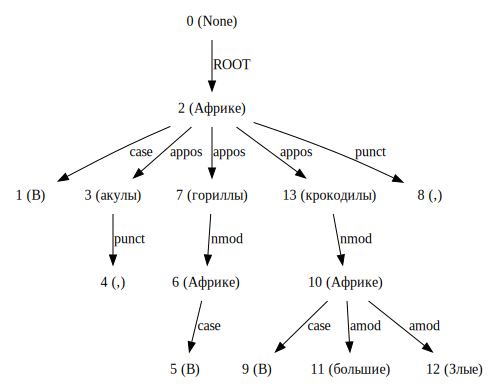

In [9]:
ud_graph = DependencyGraph(tree_str=ud[0])
ud_graph

In [10]:
sentence = "В Африке акулы, В Африке гориллы,  Африке большие Злые крокодилы Будут вас кусать, Бить и обижать,- Не ходите, дети, В Африку гулять."
parsed = pipeline.process(sentence) # функция process сделает синтаксический анализ

print(parsed)

# newdoc
# newpar
# sent_id = 1
# text = В Африке акулы, В Африке гориллы, Африке большие Злые крокодилы Будут вас кусать, Бить и обижать,- Не ходите, дети, В Африку гулять.
1	В	В	ADP	IN	_	2	case	_	_
2	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	13	obl	_	_
3	акулы	АКУЛА	NOUN	NN	Animacy=Anim|Case=Nom|Gender=Fem|Number=Plur	2	conj	_	SpaceAfter=No
4	,	,	PUNCT	,	_	3	punct	_	_
5	В	В	ADP	IN	_	6	case	_	_
6	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	2	conj	_	_
7	гориллы	гориллы	NOUN	NN	Animacy=Inan|Case=Nom|Gender=Masc|Number=Plur	6	appos	_	SpaceAfter=No
8	,	,	PUNCT	,	_	6	punct	_	SpacesAfter=\s\s
9	Африке	АФРИКА	PROPN	NNP	Animacy=Anim|Case=Loc|Gender=Masc|Number=Sing	2	flat	_	_
10	большие	БОЛЬШОЙ	ADJ	JJS	Animacy=Inan|Case=Nom|Degree=Sup|Number=Plur	9	amod	_	_
11	Злые	Злые	ADJ	JJL	Animacy=Inan|Case=Nom|Number=Plur	12	amod	_	_
12	крокодилы	крокодИЛА	NOUN	NN	Animacy=Inan|Case=Nom|Gender=Masc|Number=Plur	13	nsubj	_	_
13	Будут	БЫТЬ	VERB	VBC	Aspect=

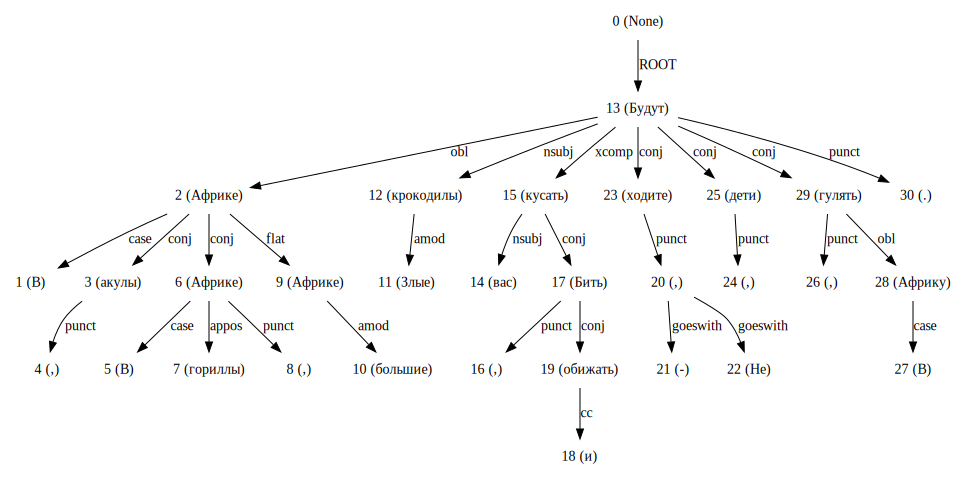

In [12]:
ud = conllu_to_list(parsed)
ud_graph = DependencyGraph(tree_str=ud[0])
ud_graph